# Seasonal Athletes

When the modern Olympic Games began in 1896, the competition involved solely summer games. However, in 1924, the IOC introduced winter games into the program, hosted during the same year as the summer games, but typically in a different city more suited to winter sports. Both the summer and winter games grew tremendously over time, and eventually, in 1992, the IOC reached the decision to split the summer and winter games. In previous notebooks, our analysis the Olympic Games has intersected with seasonal differences in country participation, types of athletes, and medalists. Thus, we have already explored many questions with regards to the summer and winter games. In this notebook, we will focus on the following questions:
- Is there a significant height difference between summer and winter athletes?
- Is there a significant weight difference between summer and winter athletes?
- Is there a significant age difference between summer and winter athletes?

For our three research questions, we will follow the same process of A/B hypothesis testing:
1. Using the original (pre-scrubbed) dataframe, create a new dataframe by dropping all rows with null values for the given feature
2. Plot the feature distribution for summer vs. winter athletes
3. Evalute the normality of each distribution
4. Perform a two-sample t-test to determine the significance of the difference of means
5. Visualize the difference of means between summer and winter athletes
6. If the p-value indicates significant difference, use Cohen's d value to determine extent of that difference

Following this process for height, weight, and age, we will summarize our results at the bottom.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv('cleaned_data.csv')

In [3]:
unclean_data = pd.read_csv('athlete_events.csv')

In [4]:
sunclean = unclean_data[unclean_data.Season=='Summer']
wunclean = unclean_data[unclean_data.Season=='Winter']

## Is there a significant height difference between summer and winter athletes?

In [6]:
snonnull_height = sunclean.drop(sunclean[sunclean['Height'].isna()==True].index)
wnonnull_height = wunclean.drop(wunclean[wunclean['Height'].isna()==True].index)

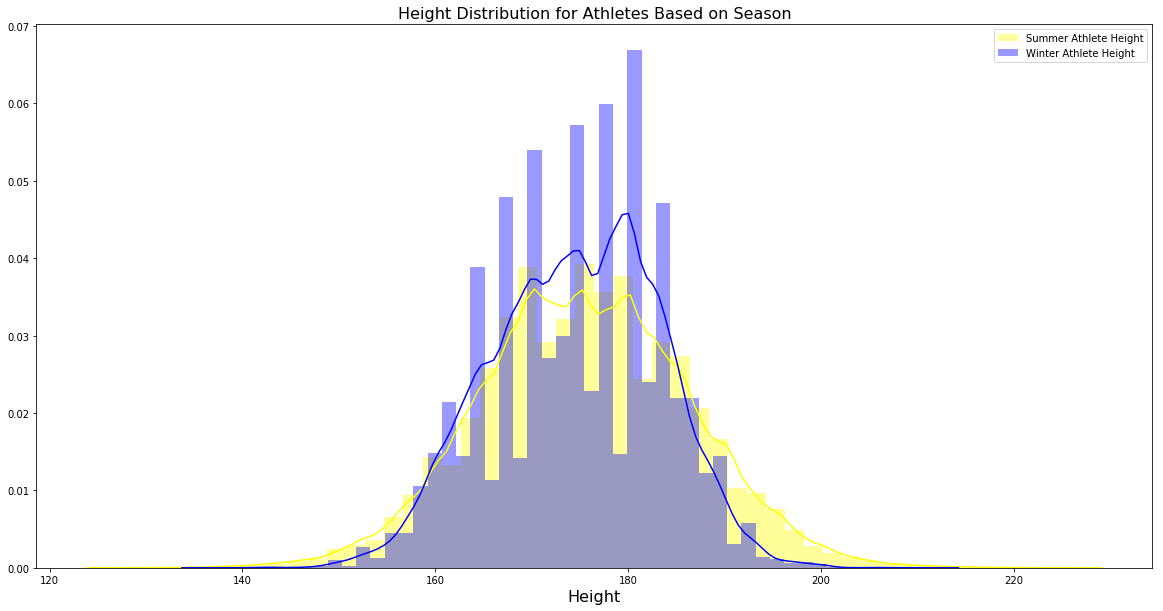

In [8]:
plt.figure(figsize=(20, 10))
sns.distplot(snonnull_height['Height'], label="Summer Athlete Height", color='yellow')
sns.distplot(wnonnull_height['Height'], label="Winter Athlete Height", color='blue')
plt.title('Height Distribution for Athletes Based on Season', fontsize=16)
plt.xlabel('Height', fontsize=16)
plt.legend()
plt.show()

In [9]:
from scipy import stats
print('Normality of summer athlete height distribution: ', stats.normaltest(snonnull_height.Height))
print('Normality of winter athlete height distribution: ', stats.normaltest(wnonnull_height.Height))

Normality of summer athlete height distribution:  NormaltestResult(statistic=125.2371100205934, pvalue=6.384208973375975e-28)
Normality of winter athlete height distribution:  NormaltestResult(statistic=467.09139038316044, pvalue=3.735883339415087e-102)


In [10]:
print(len(snonnull_height.Height))
print(len(wnonnull_height.Height))

170695
40250


In [11]:
np.var(snonnull_height['Height']) == np.var(wnonnull_height['Height'])

False

In [12]:
print('T-Test Results for difference in seasonal athlete height:',
      stats.ttest_ind(snonnull_height['Height'], wnonnull_height['Height'], equal_var=False))

T-Test Results for difference in seasonal athlete height: Ttest_indResult(statistic=18.381820931423434, pvalue=2.70280455753167e-75)


Text(0.5, 1.0, 'Average Height of Athletes By Season')

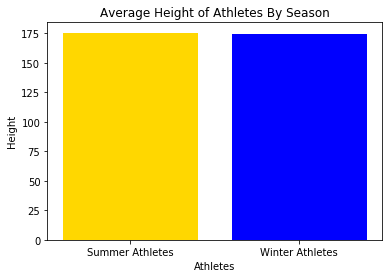

In [18]:
x = ['Summer Athletes', 'Winter Athletes']
y = [np.array(snonnull_height.Height).mean(),np.array(wnonnull_height.Height).mean()]
plt.bar(x,y,color=('gold','blue'))
plt.ylabel('Height')
plt.xlabel('Athletes')
plt.title('Average Height of Athletes By Season')

In [19]:
print('Average Summer Athlete Height',np.array(snonnull_height.Height).mean())
print('Average Winter Athlete Height',np.array(wnonnull_height.Height).mean())
print('Difference in Means',np.array(snonnull_height.Height).mean()-np.array(wnonnull_height.Height).mean())

Average Summer Athlete Height 175.51555112920707
Average Winter Athlete Height 174.59011180124224
Difference in Means 0.9254393279648241


In [20]:
def Cohen_d(group1, group2):
    diff = group1.mean() - group2.mean()

    n1, n2 = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    
    d = diff / np.sqrt(pooled_var)
    
    return d

In [21]:
Cohen_d(np.array(snonnull_height.Height),np.array(wnonnull_height.Height))

0.08803521307662064

## Is there a significant weight difference between summer and winter athletes?

In [22]:
snonnull_weight = sunclean.drop(sunclean[sunclean['Weight'].isna()==True].index)
wnonnull_weight = wunclean.drop(wunclean[wunclean['Weight'].isna()==True].index)

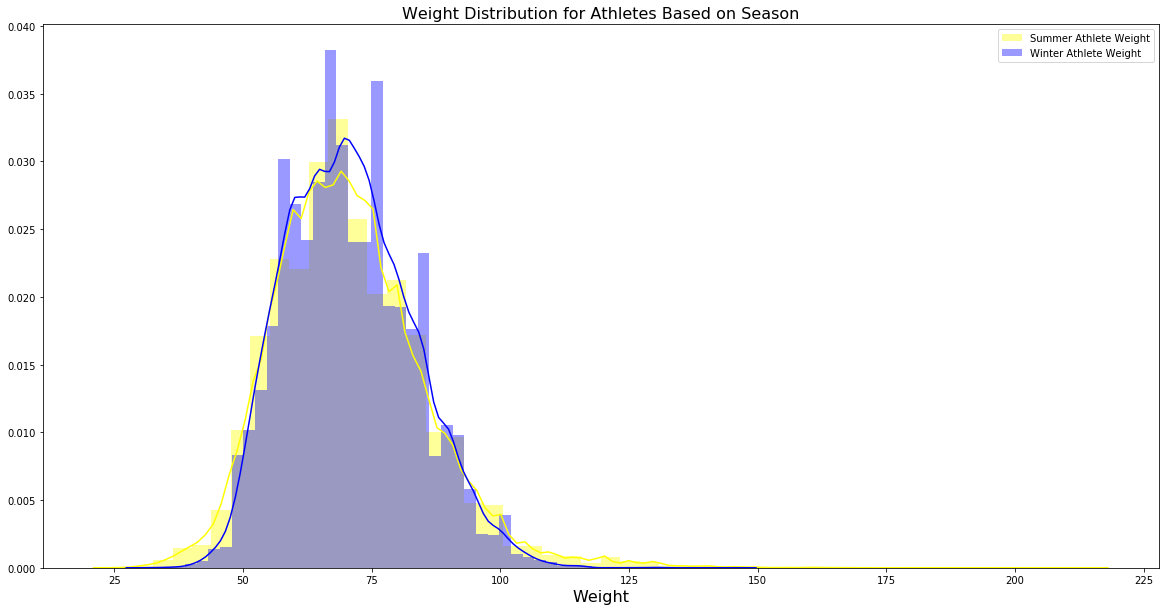

In [23]:
plt.figure(figsize=(20, 10))
sns.distplot(snonnull_weight['Weight'], label="Summer Athlete Weight", color='yellow')
sns.distplot(wnonnull_weight['Weight'], label="Winter Athlete Weight", color='blue')
plt.title('Weight Distribution for Athletes Based on Season', fontsize=16)
plt.xlabel('Weight', fontsize=16)
plt.legend()
plt.show()

In [24]:
print('Normality of summer athlete weight distribution: ', stats.normaltest(snonnull_weight.Weight))
print('Normality of winter athlete weight distribution: ', stats.normaltest(wnonnull_weight.Weight))

Normality of summer athlete weight distribution:  NormaltestResult(statistic=23875.54834514398, pvalue=0.0)
Normality of winter athlete weight distribution:  NormaltestResult(statistic=917.3847812348373, pvalue=6.200487893100195e-200)


In [25]:
print(len(snonnull_weight.Weight))
print(len(wnonnull_weight.Weight))

168698
39543


In [26]:
np.var(snonnull_weight['Weight']) == np.var(wnonnull_weight['Weight'])

False

In [27]:
print('T-Test Results for difference in seasonal athlete weight:',
      stats.ttest_ind(snonnull_weight['Weight'], wnonnull_weight['Weight'], equal_var=False))

T-Test Results for difference in seasonal athlete weight: Ttest_indResult(statistic=-0.9859840406123616, pvalue=0.32414437519495676)


Text(0.5, 1.0, 'Average Weight of Athletes By Season')

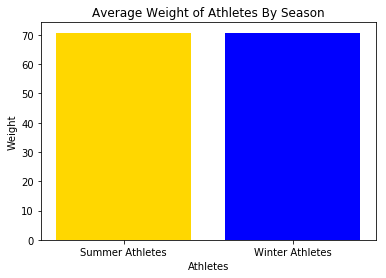

In [28]:
x = ['Summer Athletes', 'Winter Athletes']
y = [np.array(snonnull_weight.Weight).mean(),np.array(wnonnull_weight.Weight).mean()]
plt.bar(x,y,color=('gold','blue'))
plt.ylabel('Weight')
plt.xlabel('Athletes')
plt.title('Average Weight of Athletes By Season')

In [29]:
print('Average Summer Athlete Weight',np.array(snonnull_weight.Weight).mean())
print('Average Winter Athlete Weight',np.array(wnonnull_weight.Weight).mean())
print('Difference in Means',np.array(snonnull_weight.Weight).mean()-np.array(wnonnull_weight.Weight).mean())

Average Summer Athlete Weight 70.68905973989021
Average Winter Athlete Weight 70.75927471360292
Difference in Means -0.07021497371270868


## Is there a significant age difference between summer and winter athletes?

In [30]:
sage_nonnull = sunclean.drop(sunclean[sunclean['Age'].isna()==True].index)
wage_nonnull = wunclean.drop(wunclean[wunclean['Age'].isna()==True].index)

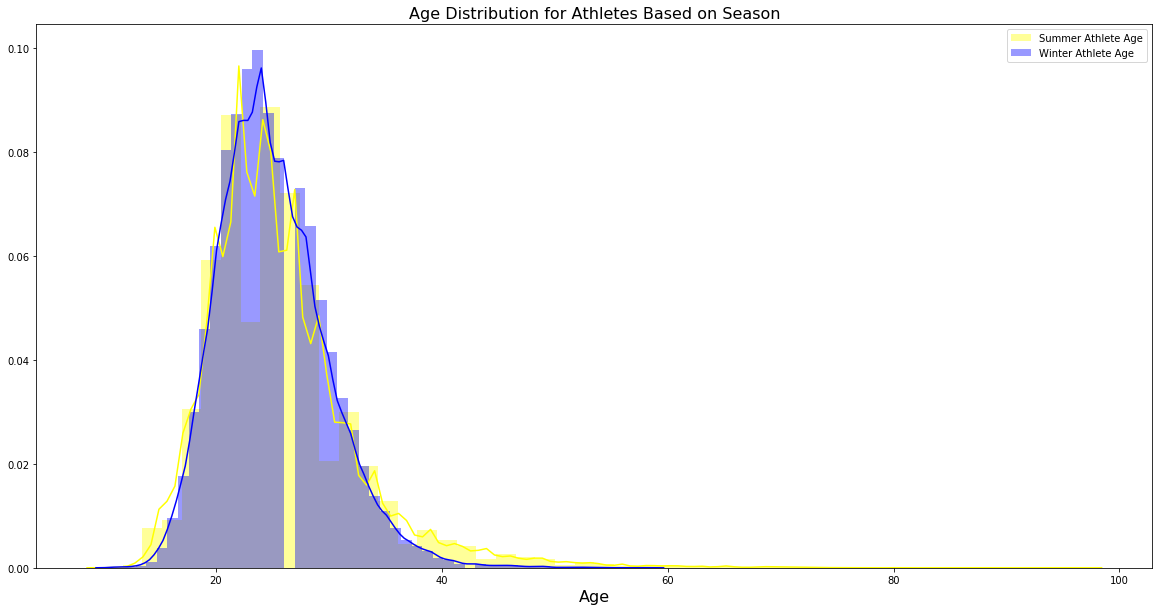

In [31]:
plt.figure(figsize=(20, 10))
sns.distplot(sage_nonnull['Age'], label="Summer Athlete Age", color='yellow')
sns.distplot(wage_nonnull['Age'], label="Winter Athlete Age", color='blue')
plt.title('Age Distribution for Athletes Based on Season', fontsize=16)
plt.xlabel('Age', fontsize=16)
plt.legend()
plt.show()

In [32]:
print('Normality of summer athlete age distribution: ', stats.normaltest(sage_nonnull.Age))
print('Normality of winter athlete age distribution: ', stats.normaltest(wage_nonnull.Age))

Normality of summer athlete age distribution:  NormaltestResult(statistic=81597.9593951718, pvalue=0.0)
Normality of winter athlete age distribution:  NormaltestResult(statistic=5071.41002140488, pvalue=0.0)


In [33]:
print(len(sage_nonnull.Age))
print(len(wage_nonnull.Age))

213363
48279


In [34]:
np.var(sage_nonnull['Age']) == np.var(wage_nonnull['Age'])

False

In [35]:
print('T-Test Results for difference in seasonal athlete age:',
      stats.ttest_ind(sage_nonnull['Age'], wage_nonnull['Age'], equal_var=False))

T-Test Results for difference in seasonal athlete age: Ttest_indResult(statistic=24.29058230183551, pvalue=6.072683349872323e-130)


Text(0.5, 1.0, 'Average Age of Athletes By Season')

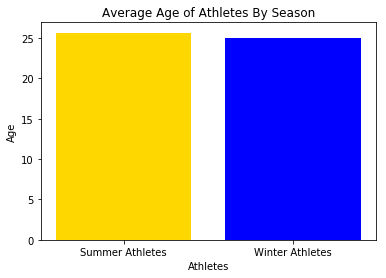

In [36]:
x = ['Summer Athletes', 'Winter Athletes']
y = [np.array(sage_nonnull.Age).mean(),np.array(wage_nonnull.Age).mean()]
plt.bar(x,y,color=('gold','blue'))
plt.ylabel('Age')
plt.xlabel('Athletes')
plt.title('Average Age of Athletes By Season')

In [37]:
print('Average Summer Athlete Age',np.array(sage_nonnull.Age).mean())
print('Average Winter Athlete Age',np.array(wage_nonnull.Age).mean())
print('Difference in Means',np.array(sage_nonnull.Age).mean()-np.array(wage_nonnull.Age).mean())

Average Summer Athlete Age 25.67405313948529
Average Winter Athlete Age 25.0391474554154
Difference in Means 0.6349056840698921


In [38]:
Cohen_d(np.array(sage_nonnull.Age),np.array(wage_nonnull.Age))

0.09937787381796107

## Summary

Our A/B testing above revealed the following insights:

**Height**
- With a p-value of 2.70e-75, the t-test indicates that statistically significant difference *exists* between the heights of summer and winter athletes.
- Compared the average summer athlete height of 175.52 cm, the average winter athlete height is 0.93 cm less at 174.59 cm.
- The Cohen's d value of 0.088 indicates this height difference is small enough to be negligible.

**Weight**
- With a p-value of 0.324, the t-test indicates that statistically significant difference *does not exist* between the weights of summer and winter athletes.
- Compared the average summer athlete weight of 70.69 kg, the average winter athlete weight is 0.07 kg more at 70.76 kg.

**Age**
**Height**
- With a p-value of 6.07e-130, the t-test indicates that statistically significant difference *exists* between the age of summer and winter athletes.
- Compared the average summer athlete age of 25.67 years, the average winter athlete age is 0.63 years less at 25.04 years.
- The Cohen's d value of 0.10 indicates this age difference is small enough to be negligible.

Based on the observations above, we conclude that little consistent difference exists between summer and winter athletes. Due to the large amount of missing data withing these features from the first half of the 20th century, and the lack of consistency across the board until recent years, we likely need more data to truly explore and evaluate the differences between summer and winter athletes.